# PCA Demo

<hr>

In [44]:
import numpy as np
from numpy import cov
from numpy.linalg import eig

In [45]:
A = np.random.rand(10, 5)
A

array([[0.51733606, 0.50535655, 0.32956239, 0.29684651, 0.54712725],
       [0.51827145, 0.7879443 , 0.49648179, 0.84191648, 0.71272704],
       [0.88374338, 0.33796263, 0.2834681 , 0.1061411 , 0.20064351],
       [0.34956361, 0.24106951, 0.08764545, 0.01258527, 0.67973684],
       [0.94723078, 0.18080123, 0.50664273, 0.4257812 , 0.00813147],
       [0.90723034, 0.01024721, 0.73523055, 0.24104149, 0.81770634],
       [0.22772534, 0.9325652 , 0.35195592, 0.25003321, 0.30751659],
       [0.68164277, 0.05284718, 0.58450216, 0.19861799, 0.30752235],
       [0.12521182, 0.35797433, 0.13971858, 0.65685796, 0.88501354],
       [0.47342733, 0.6523714 , 0.38886828, 0.50059387, 0.90332184]])

In [46]:
np.std(A, axis=0)

array([0.27291241, 0.29324259, 0.18774102, 0.24194946, 0.29725708])

In [47]:
# 1. Normalize data
M = np.mean(A, axis=0)

In [48]:
X = (M - A)/np.std(A, axis=0)
X

array([[ 0.16782757, -0.33911375,  0.32409118,  0.23225923, -0.03425509],
       [ 0.16440013, -1.30277921, -0.56500278, -2.02056651, -0.59134794],
       [-1.17475455,  0.23172393,  0.56961178,  1.02046272,  1.13134788],
       [ 0.78257591,  0.56214361,  1.61265846,  1.40713782, -0.48036588],
       [-1.40738376,  0.76766721, -0.61912486, -0.30064004,  1.77897596],
       [-1.26081495,  1.3492813 , -1.8366948 ,  0.46290668, -0.94450791],
       [ 1.22901318, -1.79595755,  0.2048123 ,  0.42574304,  0.77181705],
       [-0.43422168,  1.2040092 , -1.03384209,  0.63824702,  0.77179769],
       [ 1.6046411 ,  0.16348111,  1.33529164, -1.25570212, -1.17093548],
       [ 0.32871704, -0.84045585,  0.00819915, -0.60984786, -1.23252628]])

In [49]:
X = M-A

In [50]:
X

array([[ 0.04580223, -0.09944259,  0.06084521,  0.056195  , -0.01018257],
       [ 0.04486684, -0.38203035, -0.1060742 , -0.48887497, -0.17578236],
       [-0.3206051 ,  0.06795132,  0.1069395 ,  0.2469004 ,  0.33630117],
       [ 0.21357468,  0.16484445,  0.30276214,  0.34045623, -0.14279216],
       [-0.3840925 ,  0.22511272, -0.11623513, -0.07273969,  0.5288132 ],
       [-0.34409205,  0.39566674, -0.34482295,  0.11200002, -0.28076167],
       [ 0.33541295, -0.52665124,  0.03845167,  0.1030083 ,  0.22942808],
       [-0.11850449,  0.35306677, -0.19409457,  0.15442352,  0.22942233],
       [ 0.43792647,  0.04793963,  0.25068901, -0.30381645, -0.34806886],
       [ 0.08971096, -0.24645745,  0.00153932, -0.14755236, -0.36637716]])

In [51]:
# 2. Find covariance
def sigma(X):
    m = X.shape[0]
    cov = (1/(m-1)) * (np.matmul(X.T, X))
    return cov

In [52]:
sigma = sigma(X)

In [53]:
sigma

array([[ 0.08275687, -0.05005395,  0.03750224, -0.01849339, -0.04318958],
       [-0.05005395,  0.09554579, -0.01645479,  0.03378771,  0.01213531],
       [ 0.03750224, -0.01645479,  0.03916299,  0.00579879, -0.00860268],
       [-0.01849339,  0.03378771,  0.00579879,  0.06504393,  0.02986009],
       [-0.04318958,  0.01213531, -0.00860268,  0.02986009,  0.09817975]])

In [54]:
# Find eigenvalues and eigenvectors

eig_values, eig_vectors = np.linalg.eig(sigma)

In [55]:
acs_index = np.argsort(eig_values)

In [56]:
eig_values[acs_index]

array([0.01138673, 0.02447723, 0.06980314, 0.08594738, 0.18907485])

In [57]:
dsc_index = acs_index[::-1]
dsc_index

array([0, 4, 3, 2, 1], dtype=int64)

In [58]:
eig_values[dsc_index]

array([0.18907485, 0.08594738, 0.06980314, 0.02447723, 0.01138673])

In [59]:
eig_vectors[:, dsc_index]

array([[ 0.57755984,  0.09225668, -0.42731781, -0.24663578, -0.64380402],
       [-0.52997112, -0.59708714, -0.2731189 , -0.50304103, -0.18701162],
       [ 0.21700147,  0.15423283, -0.51654184, -0.39562891,  0.71118555],
       [-0.33487404,  0.10306623, -0.68903803,  0.63054158, -0.06986155],
       [-0.47573625,  0.77496144,  0.03488096, -0.3633395 , -0.19969355]])

In [60]:
dsc_eigVec = eig_vectors[:, dsc_index]

In [61]:
new_x = np.matmul(X, dsc_eigVec)

In [62]:
dsc_eigVec.shape

(5, 5)

In [63]:
new_2d_x = np.matmul(X, dsc_eigVec[:, :2])

In [64]:
new_x.shape

(10, 5)

In [65]:
new_2d_x.shape

(10, 2)

In [66]:
import matplotlib.pyplot as plt

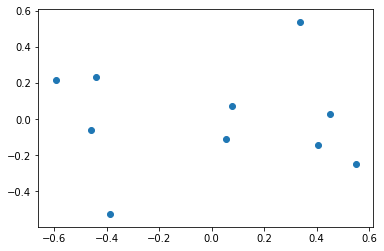

In [67]:
plt.scatter(new_2d_x[:, 0], new_2d_x[:, 1])

In [68]:
u, d, v = np.linalg.svd(sigma)

In [69]:
# u = eigenvector
u

array([[-0.57755984, -0.09225668,  0.42731781, -0.24663578, -0.64380402],
       [ 0.52997112,  0.59708714,  0.2731189 , -0.50304103, -0.18701162],
       [-0.21700147, -0.15423283,  0.51654184, -0.39562891,  0.71118555],
       [ 0.33487404, -0.10306623,  0.68903803,  0.63054158, -0.06986155],
       [ 0.47573625, -0.77496144, -0.03488096, -0.3633395 , -0.19969355]])

In [70]:
# d = eigenvalues
d

array([0.18907485, 0.08594738, 0.06980314, 0.02447723, 0.01138673])

In [71]:
svd_x = np.matmul(X, u[:, :2])
svd_x

array([[-0.0783847 , -0.07088649],
       [-0.45269766, -0.0292735 ],
       [ 0.44064603, -0.23241029],
       [-0.05561064,  0.10759582],
       [ 0.59357981, -0.21453855],
       [ 0.38719018,  0.52721138],
       [-0.33753301, -0.53974588],
       [ 0.45853438,  0.05797091],
       [-0.54925123,  0.25061118],
       [-0.40647317,  0.14346542]])

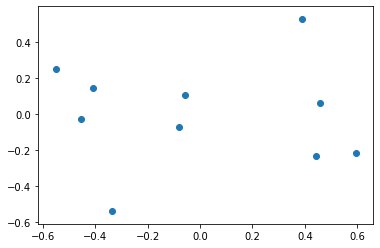

In [72]:
plt.scatter(svd_x[:, 0], svd_x[:, 1])

In [73]:
# Cumulative variance
cum_var = (np.cumsum(eig_values[dsc_index]) / eig_values[dsc_index].sum())*100
cum_var

array([ 49.66644327,  72.24321862,  90.57920375,  97.00891744,
       100.        ])

In [74]:
variance = eig_values[dsc_index]/eig_values[dsc_index].sum()*100
variance

array([49.66644327, 22.57677535, 18.33598513,  6.42971369,  2.99108256])

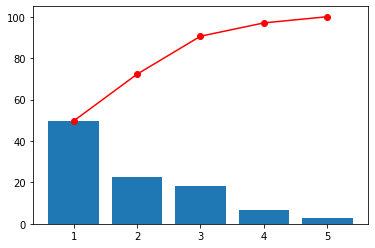

In [75]:
plt.plot(np.arange(1, X.shape[1] + 1), cum_var, c= 'red', marker = 'o')
plt.bar(np.arange(1, X.shape[1] + 1), variance)
plt.xticks(np.arange(1, X.shape[1] + 1))
plt.show()

# PCA Lab part
<hr>

In [76]:
from sklearn import datasets
X, color = datasets.make_swiss_roll(n_samples=1000, noise=0.05, random_state=None)
X.shape

(1000, 3)

In [77]:
X

array([[  0.21466355,  19.6659266 ,  -4.63111291],
       [  3.18492051,  10.58573403,   6.62493791],
       [  0.04662663,  11.65499173,  -4.70552958],
       ...,
       [ -0.39509698,   8.44672292,   7.85074826],
       [ -3.40798271,   5.6330612 , -10.19929343],
       [  0.39736176,  13.10885903,   7.7624156 ]])

In [78]:
color.shape

(1000,)

In [79]:
np.mean(X, axis=0)

array([ 2.0068027 , 10.62284898, -0.07238179])

In [80]:
def normalise_data(X):
    mu = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    norm = (X-mu)/std
    return norm

In [81]:
X_norm = normalise_data(X)

In [82]:
def CovarMatrix(norm):
    m = X.shape[0]
    cov = (1/(m-1)) * (np.matmul(X.T, X))
    return sigma

In [83]:
sigma = CovarMatrix(X_norm)
sigma

array([[ 0.08275687, -0.05005395,  0.03750224, -0.01849339, -0.04318958],
       [-0.05005395,  0.09554579, -0.01645479,  0.03378771,  0.01213531],
       [ 0.03750224, -0.01645479,  0.03916299,  0.00579879, -0.00860268],
       [-0.01849339,  0.03378771,  0.00579879,  0.06504393,  0.02986009],
       [-0.04318958,  0.01213531, -0.00860268,  0.02986009,  0.09817975]])

In [84]:
eig_values[dsc_index]

array([0.18907485, 0.08594738, 0.06980314, 0.02447723, 0.01138673])

In [85]:
eig_vectors[:, dsc_index]

array([[ 0.57755984,  0.09225668, -0.42731781, -0.24663578, -0.64380402],
       [-0.52997112, -0.59708714, -0.2731189 , -0.50304103, -0.18701162],
       [ 0.21700147,  0.15423283, -0.51654184, -0.39562891,  0.71118555],
       [-0.33487404,  0.10306623, -0.68903803,  0.63054158, -0.06986155],
       [-0.47573625,  0.77496144,  0.03488096, -0.3633395 , -0.19969355]])

In [86]:
def find_eig(sigma):
    eig_value, eig_vector = np.linalg.eig(sigma)
    ac_index = np.argsort(eig_value)
    dc_index = ac_index[::-1]
    eig_vector = eig_vector[:, dc_index]
    eig_value = eig_value[dc_index]
    return eig_vector, eig_value

In [87]:
eig_vec, eig_val = find_eig(sigma)

In [88]:
X_norm

array([[-0.27188513,  1.49531325, -0.64735936],
       [ 0.17873206, -0.00613712,  0.95104811],
       [-0.29737799,  0.17066941, -0.65792685],
       ...,
       [-0.3643918 , -0.35983216,  1.12511843],
       [-0.82147619, -0.82508368, -1.43806486],
       [-0.24416802,  0.41107286,  1.11257482]])

In [89]:
eig_vec[:, :2].shape

(5, 2)

In [90]:
X_norm.shape

(1000, 3)

In [91]:
eig_vec[:3, :2].shape

(3, 2)

In [92]:
eig_vec

array([[ 0.57755984,  0.09225668, -0.42731781, -0.24663578, -0.64380402],
       [-0.52997112, -0.59708714, -0.2731189 , -0.50304103, -0.18701162],
       [ 0.21700147,  0.15423283, -0.51654184, -0.39562891,  0.71118555],
       [-0.33487404,  0.10306623, -0.68903803,  0.63054158, -0.06986155],
       [-0.47573625,  0.77496144,  0.03488096, -0.3633395 , -0.19969355]])

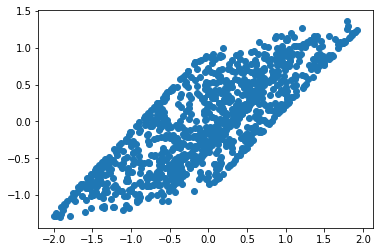

In [93]:
X_2d = np.matmul(X_norm, eig_vec[:3, :2])
plt.scatter(X_2d[:, 0], X_2d[:, 1])

In [94]:
# Cumulative variance
cum_var = (np.cumsum(eig_val) / eig_val.sum())*100
cum_var

array([ 49.66644327,  72.24321862,  90.57920375,  97.00891744,
       100.        ])

In [95]:
variance = eig_val/eig_val.sum()*100
variance

array([49.66644327, 22.57677535, 18.33598513,  6.42971369,  2.99108256])

In [96]:
np.arange(1, X_norm.shape[1] + 1)

array([1, 2, 3])

In [97]:
def eig_svd(sigma):
    # u = eigenvector, d = eigenvalue
    u, d, v = np.linalg.svd(sigma)
    ac_index = np.argsort(d)
    dc_index = ac_index[::-1]
    eigen_vector = u[:, dc_index]
    eigen_value = d[dc_index]
    return eigen_vector, eigen_value

In [98]:
eigen_vector, eigen_value = eig_svd(sigma)

In [99]:
# Cumulative variance

cum_var = (np.cumsum(eigen_value) / eigen_value.sum())*100
cum_var
variance = eigen_value/eigen_value.sum()*100

In [100]:
cum_var

array([ 49.66644327,  72.24321862,  90.57920375,  97.00891744,
       100.        ])

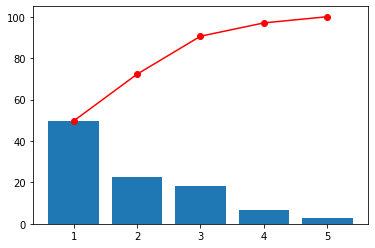

In [101]:
plt.plot(np.arange(1, X_norm.shape[1] + 3), cum_var, c= 'red', marker = 'o')
plt.bar(np.arange(1, X_norm.shape[1] + 3), variance)
plt.xticks(np.arange(1, X_norm.shape[1] + 3))
plt.show()

Text(0.5, 1.0, 'Plot by eig method')

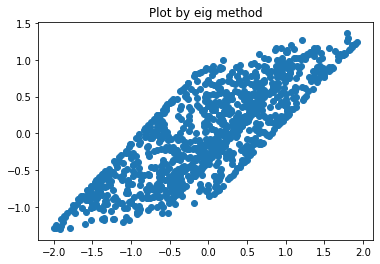

In [102]:
# eig method
X_2d = np.matmul(X_norm, eig_vec[:3, :2])
plt.scatter(X_2d[:, 0], X_2d[:, 1])
plt.title('Plot by eig method')

Text(0.5, 1.0, 'Plot by svd method')

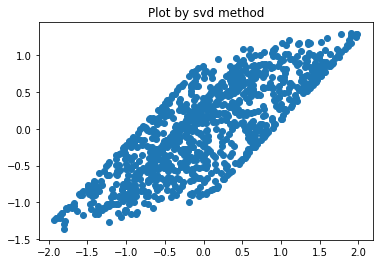

In [103]:
# svd method
X_2d = np.matmul(X_norm, eigen_vector[:3, :2])
plt.scatter(X_2d[:, 0], X_2d[:, 1])
plt.title('Plot by svd method')

In [104]:
eigen_vector, eigen_value

(array([[-0.57755984, -0.09225668,  0.42731781, -0.24663578, -0.64380402],
        [ 0.52997112,  0.59708714,  0.2731189 , -0.50304103, -0.18701162],
        [-0.21700147, -0.15423283,  0.51654184, -0.39562891,  0.71118555],
        [ 0.33487404, -0.10306623,  0.68903803,  0.63054158, -0.06986155],
        [ 0.47573625, -0.77496144, -0.03488096, -0.3633395 , -0.19969355]]),
 array([0.18907485, 0.08594738, 0.06980314, 0.02447723, 0.01138673]))

In [105]:
eig_vec, eig_val

(array([[ 0.57755984,  0.09225668, -0.42731781, -0.24663578, -0.64380402],
        [-0.52997112, -0.59708714, -0.2731189 , -0.50304103, -0.18701162],
        [ 0.21700147,  0.15423283, -0.51654184, -0.39562891,  0.71118555],
        [-0.33487404,  0.10306623, -0.68903803,  0.63054158, -0.06986155],
        [-0.47573625,  0.77496144,  0.03488096, -0.3633395 , -0.19969355]]),
 array([0.18907485, 0.08594738, 0.06980314, 0.02447723, 0.01138673]))

In [106]:
np.mean(eigen_value) - eig_val

array([-0.11293699, -0.00980951,  0.00633473,  0.05166063,  0.06475114])

## Import Iris dataset
<hr>

In [107]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [108]:
iris = load_iris()
iris.target_names, iris.feature_names

(array(['setosa', 'versicolor', 'virginica'], dtype='<U10'),
 ['sepal length (cm)',
  'sepal width (cm)',
  'petal length (cm)',
  'petal width (cm)'])

In [109]:
X = iris.data
y = iris.target

In [110]:
X_norm = normalise_data(X)

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.3, shuffle=True)

In [112]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2).fit(X_train)
pca

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [113]:
pca.explained_variance_ratio_

array([0.747765  , 0.21704891])

In [114]:
X_norm.shape[1]

4

In [115]:
sigma = CovarMatrix(X_norm)
sigma

array([[ 0.08275687, -0.05005395,  0.03750224, -0.01849339, -0.04318958],
       [-0.05005395,  0.09554579, -0.01645479,  0.03378771,  0.01213531],
       [ 0.03750224, -0.01645479,  0.03916299,  0.00579879, -0.00860268],
       [-0.01849339,  0.03378771,  0.00579879,  0.06504393,  0.02986009],
       [-0.04318958,  0.01213531, -0.00860268,  0.02986009,  0.09817975]])

In [116]:
eigen_vector, eigen_value = eig_svd(sigma)

In [117]:
# Cumulative variance

cum_var = (np.cumsum(eigen_value) / eigen_value.sum())*100
cum_var
variance = eigen_value/eigen_value.sum()*100

In [118]:
cum_var.shape

(5,)

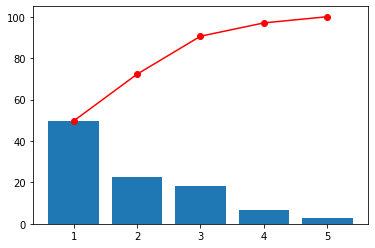

In [119]:
plt.plot(np.arange(1, X_norm.shape[1] + 2), cum_var, c= 'red', marker = 'o')
plt.bar(np.arange(1, X_norm.shape[1] + 2), variance)
plt.xticks(np.arange(1, X_norm.shape[1] + 2))
plt.show()

In [120]:
X_train.shape

(105, 4)

In [121]:
X_train.shape[1]

4

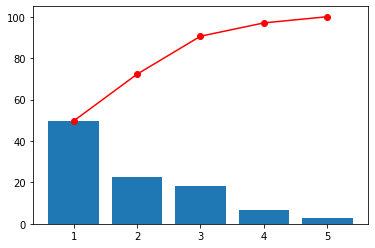

In [122]:
plt.plot(np.arange(1, X_train.shape[1] + 2), cum_var, c= 'red', marker = 'o')
plt.bar(np.arange(1, X_train.shape[1] + 2), variance)
plt.xticks(np.arange(1, X_train.shape[1] + 2))
plt.show()

In [123]:
eig_vectors[:3, :2]

array([[ 0.57755984, -0.64380402],
       [-0.52997112, -0.18701162],
       [ 0.21700147,  0.71118555]])

In [124]:
eig_vectors

array([[ 0.57755984, -0.64380402, -0.24663578, -0.42731781,  0.09225668],
       [-0.52997112, -0.18701162, -0.50304103, -0.2731189 , -0.59708714],
       [ 0.21700147,  0.71118555, -0.39562891, -0.51654184,  0.15423283],
       [-0.33487404, -0.06986155,  0.63054158, -0.68903803,  0.10306623],
       [-0.47573625, -0.19969355, -0.3633395 ,  0.03488096,  0.77496144]])

In [125]:
eig_vectors[:3, :2].shape

(3, 2)

In [126]:
X_train.shape

(105, 4)

In [127]:
feature_names = iris.feature_names
feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [128]:
for i, feature in enumerate(feature_names):
    print(i, 'and')
    print(feature)

0 and
sepal length (cm)
1 and
sepal width (cm)
2 and
petal length (cm)
3 and
petal width (cm)


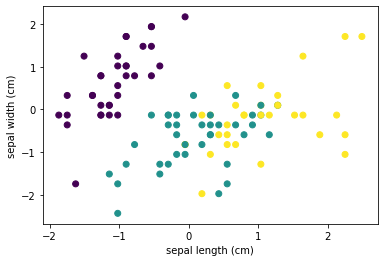

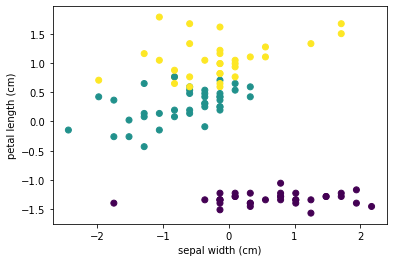

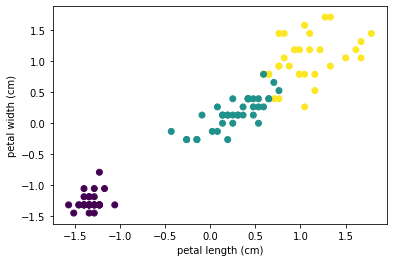

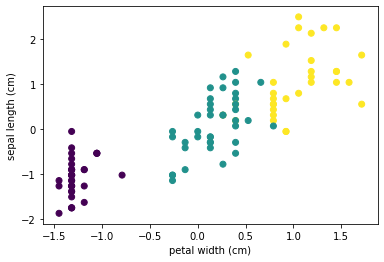

In [129]:
# plot combination of original training data
X_train.shape
for i, feature in enumerate(feature_names):
    if i != 3:
        plt.figure()
        plt.scatter(X_train[:, i], X_train[:, i+1], c = y_train)
        plt.xlabel(feature)
        plt.ylabel(feature_names[i+1])
    else:
        plt.figure()
        plt.scatter(X_train[:, i], X_train[:, 0], c = y_train)
        plt.xlabel(feature)
        plt.ylabel(feature_names[0])

In [130]:
X_train_2d = np.matmul(X_train, eig_vectors[:-1, :])
X_test_2d = np.matmul(X_test, eig_vectors[:-1, :])

In [131]:
X_train[:, [-1, 0]]

array([[ 3.95774101e-01,  7.95669016e-01],
       [-1.31544430e+00, -1.38535265e+00],
       [ 2.64141916e-01, -7.79513300e-01],
       [-1.31544430e+00, -5.37177559e-01],
       [ 2.64141916e-01,  3.10997534e-01],
       [ 1.18556721e+00,  1.28034050e+00],
       [ 1.32509732e-01, -1.73673948e-01],
       [-1.31544430e+00, -6.58345429e-01],
       [ 2.64141916e-01,  1.15917263e+00],
       [ 3.95774101e-01,  6.74501145e-01],
       [-1.31544430e+00, -1.14301691e+00],
       [-1.30754636e-01, -9.00681170e-01],
       [ 1.32509732e-01,  5.53333275e-01],
       [ 9.22302838e-01, -5.25060772e-02],
       [ 1.32509732e-01, -2.94841818e-01],
       [ 1.32509732e-01,  9.16836886e-01],
       [-7.88915558e-01, -1.02184904e+00],
       [ 1.05393502e+00,  2.24968346e+00],
       [-1.31544430e+00, -1.26418478e+00],
       [ 9.22302838e-01, -5.25060772e-02],
       [ 1.18556721e+00,  1.52267624e+00],
       [ 3.95774101e-01,  1.89829664e-01],
       [-1.31544430e+00, -1.14301691e+00],
       [-1.

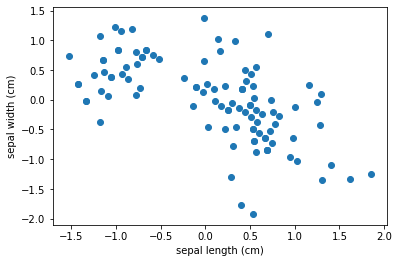

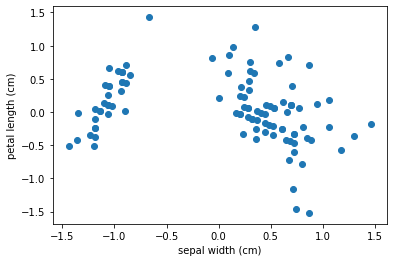

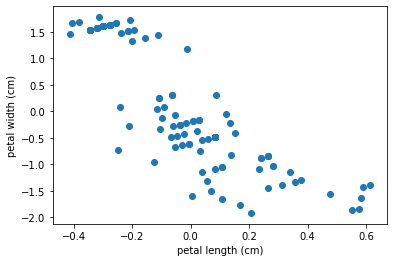

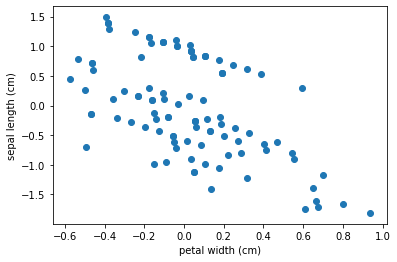

In [132]:
for i, feature in enumerate(feature_names):
    if i != 3:
        X_train_2d = np.matmul(X_train[:, i:i+2], eig_vectors[i:i+2, :])
        plt.figure()
        plt.scatter(X_train_2d[:, i], X_train_2d[:, i+1])
        plt.xlabel(feature)
        plt.ylabel(feature_names[i+1])
    else:
        X_train_2d = np.matmul(X_train[:, [-1, 0]], eig_vectors[[-1, 0], :])
        plt.figure()
        plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1])
        plt.xlabel(feature)
        plt.ylabel(feature_names[0])

In [133]:
# plot combination of projected training data
X_train_2d.shape

(105, 5)

Text(0.5, 1.0, 'Project Training data')

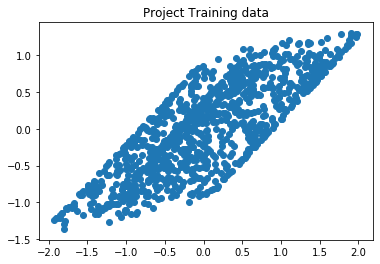

In [134]:
# Project training set to 2 dimension
X_train_2d = np.matmul(X_train[:,:-1], eig_vectors[:3, :2])
X_test_2d = np.matmul(X_test[:,:-1], eig_vectors[:3, :2])


plt.scatter(X_2d[:, 0], X_2d[:, 1])
plt.title('Project Training data')

Text(0.5, 1.0, 'Project Training data')

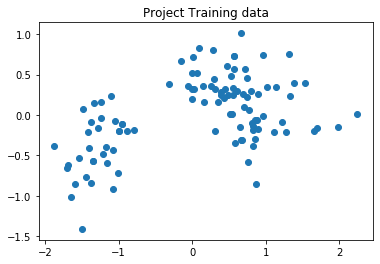

In [135]:
plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1])
plt.title('Project Training data')

Text(0.5, 1.0, 'Real Training data')

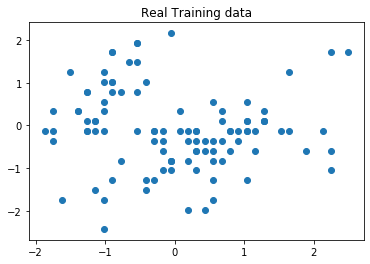

In [136]:
plt.scatter(X_train[:, 0], X_train[:, 1])
plt.title('Real Training data')

## Logistic regression classifiers

#### Training set

In [137]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [138]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [139]:
predictions = model.predict(X_test)
print(predictions)
print()
print(classification_report(y_test, predictions))
print(accuracy_score(y_test, predictions))

[1 0 2 1 0 0 2 2 0 2 1 0 1 2 1 2 0 1 1 2 2 2 1 0 1 0 0 1 1 0 0 2 0 2 2 0 0
 1 2 2 0 2 2 2 0]

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.92      1.00      0.96        11
           2       1.00      0.94      0.97        18

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

0.9777777777777777


#### Project data

In [140]:
X_test.shape

(45, 4)

In [141]:
eig_vectors[:-1, :-1].shape

(4, 4)

In [142]:
X_train_pr = np.matmul(X_train, eig_vectors[:-1, :-1])
X_test_pr = np.matmul(X_test, eig_vectors[:-1, :-1])

In [143]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [144]:
predictions = model.predict(X_test_pr)
print(predictions)
print()
print(classification_report(y_test, predictions))
print(accuracy_score(y_test, predictions))

[1 2 0 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 1 1 1 1 1 2 1 1 1 1 0 0 1 1 1 1 1
 2 1 1 1 1 1 0 2]

              precision    recall  f1-score   support

           0       0.25      0.06      0.10        16
           1       0.26      0.82      0.39        11
           2       0.00      0.00      0.00        18

    accuracy                           0.22        45
   macro avg       0.17      0.29      0.16        45
weighted avg       0.15      0.22      0.13        45

0.2222222222222222


In [145]:
eig_vectors.shape

(5, 5)

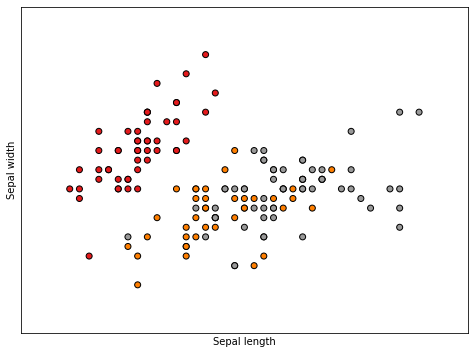

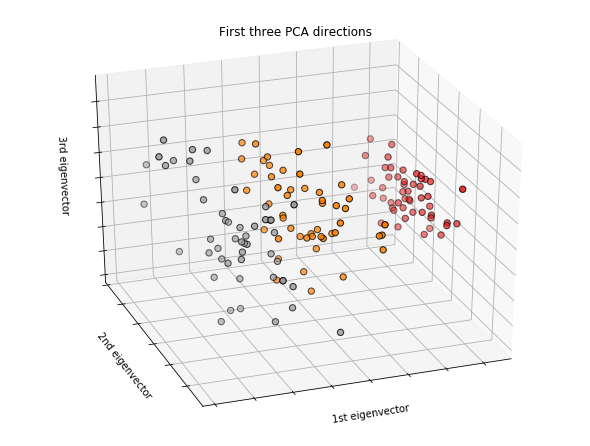

In [146]:
from mpl_toolkits.mplot3d import Axes3D
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1,
            edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(iris.data)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()